In [1]:
import numpy as np
import matplotlib.pylab as plt
import time
from copy import deepcopy

import importlib
import matplotlib as mpl
import matplotlib.patches as mp

from pyloric import create_prior, simulate, stats, wrapper, get_time
from stg_energy.common import col, svg, plot_pdf, samples_nd, get_labels_8pt
import stg_energy.fig1_posterior.viz as viz

# Figure 1

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
PANEL_A = '../svg/panel_a.svg'
PANEL_A_smaller = '../svg/panel_a_smaller.svg'
PANEL_B = '../svg/panel_b.svg'
PANEL_C = '../svg/panel_c.svg'
PANEL_D = '../svg/panel_d.svg'
PANEL_E = '../svg/panel_e.svg'
PANEL_F = '../svg/panel_f.svg'

### Load samples

In [4]:
outfile = '../../results/11deg_post_pred/11_deg_post_pred_close_to_obs.npz'
data_n = np.load(outfile)
sample_seeds = data_n["sample_seeds"]
sample_params = data_n["sample_params"]
sample_stats = data_n["sample_stats"]
print('There are', len(sample_seeds), 'datapoints in this dataset')

stats_mean = np.mean(sample_stats, axis=0)
stats_std  = np.std(sample_stats, axis=0)

There are 55043 datapoints in this dataset


### Load network

In [5]:
prior = create_prior(log=True)
dimensions = 31
lims = np.asarray([-np.sqrt(3)*np.ones(dimensions), np.sqrt(3)*np.ones(dimensions)]).T

In [6]:
params_mean = prior.mean.numpy()
params_std = prior.stddev.numpy()

In [7]:
sample_params_norm = (sample_params - params_mean) / params_std

# Panel B: experimental data

In [8]:
npz = np.load('../../results/experimental_data/trace_data_845_082_0044.npz')
t = npz['t']
PD_spikes = npz['PD_spikes']
LP_spikes = npz['LP_spikes']
PY_spikes = npz['PY_spikes']
pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

In [9]:
start_index = 219500 + 2100
end_index   = 246500 + 2100  # 32000
height_offset = 200
shown_t = t[end_index] - t[start_index]
time_len = shown_t / 0.025 * 1000
dt = t[1] - t[0]

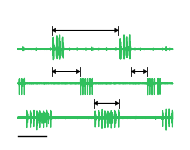

In [10]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1,figsize=(2.2, 1.7)) # (2.87, 2.08*3/4)
    ax.plot(t[start_index:end_index], 2.5+pdn[start_index:end_index]*0.007, c=col['GT'], lw=0.8)
    ax.plot(t[start_index:end_index], 1.2+lpn[start_index:end_index]*0.25, c=col['GT'], lw=0.8)
    ax.plot(t[start_index:end_index], -0.1+pyn[start_index:end_index]*0.013, c=col['GT'], lw=0.8)
    
    linew = 0.4
    headl = 0.06
    headw = 0.16
    linelen = 0.17
    circlefact = 0.8
    
    # period arrow
    height1 = 3.2
    plt.arrow(t[start_index]+0.6, height1, 1.15, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.75, height1, -1.15, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+0.6, t[start_index]+0.6], [height1-linelen,height1+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.75, t[start_index]+1.75], [height1-linelen,height1+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+1.2, 3.65), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # delay arrow
    height2 = 1.64
    plt.arrow(t[start_index]+0.6, height2, 0.48, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.08, height2, -0.48, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+0.6, t[start_index]+0.6], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.08, t[start_index]+1.08], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+0.94, 2.1), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # gap arrow
    plt.arrow(t[start_index]+1.98, height2, 0.27, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+2.25, height2, -0.27, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+1.98, t[start_index]+1.98], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+2.25, t[start_index]+2.25], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+2.1, 2.1), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # duration arrow
    height4 = 0.44
    plt.arrow(t[start_index]+1.33, height4, 0.43, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.76, height4, -0.43, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+1.33, t[start_index]+1.33], [height4-linelen,height4+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.76, t[start_index]+1.76], [height4-linelen,height4+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+1.55, 0.9), radius=0.2, color='lightgray')
    #ax.add_patch(patch)
    

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.get_xaxis().set_ticks([])
    ax.get_yaxis().set_visible(False)
    ax.set_ylim([-0.95, 4.0])
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t[start_index], t[start_index + number_of_timesteps], 2)
    
    ax.plot(t_scale, -0.8 * np.ones_like(t_scale), c='k', lw=1.0)
    
    plt.savefig(PANEL_B, facecolor='None', transparent=True)
    plt.show()

# Panel C: posterior

In [11]:
from decimal import Decimal
all_labels = []
for dim_i in range(31):
    if dim_i > len(params_mean) - 7.5: # synapses
        if dim_i == 24: all_labels.append([r'$\mathdefault{0.01}\;\;\;\;\;$ ', r'$\mathdefault{10000}\;\;\;\;$  '])
        else: all_labels.append([r'$\;\;\mathdefault{0.01}\;\;\;\;\;$ ', r'$\mathdefault{1000}\;\;\;\;$ '])
    else: # membrane conductances
        num_after_digits = -int(np.log10(lims[dim_i, 1] * params_std[dim_i] + params_mean[dim_i]))
        if num_after_digits > 2:
            num_after_digits=2
        labels = [round(Decimal((lims[dim_i, num_tmp] * params_std[dim_i] + params_mean[dim_i]) / 0.628e-3), num_after_digits)
                  for num_tmp in range(2)]
        new_labels = []
        counter=0
        for l in labels:
            if counter == 0:
                new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;\;\;$ ')
            else:
                new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;\;\;$ ')
            counter+=1
        all_labels.append(new_labels)

In [12]:
params_accepted_by_classifier = np.empty((0, 31))
for x in range(1000, 1100):
    datafile = f"../../results/classifier/classifier_prior_samples_new_nextnext1/params_{x}.npz"
    data = np.load(datafile)
    params_accepted_by_classifier = np.concatenate((params_accepted_by_classifier, data["params"]))
params_accepted_by_classifier_norm = (params_accepted_by_classifier - params_mean) / params_std

/home/michael/Documents/STG_energy/stg_energy/common.py:625: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts["labels"] == [] or opts["labels"] is None:
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


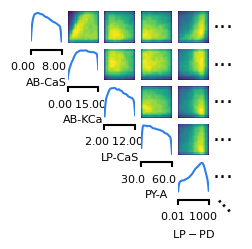

In [13]:
import matplotlib.patheffects as pe

with mpl.rc_context(fname='../../.matplotlibrc'):

    labels_ = get_labels_8pt()
    labels_[9] += ''

    fig, axes = samples_nd(samples=[params_accepted_by_classifier_norm[:100000]],
                           subset=[2,4,10,19,28],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.135, 17.0*0.135),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           samples_colors=[col['SNPE']],
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50},
                           plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]})

    plt.savefig(PANEL_C, facecolor='None', transparent=True)
    plt.show()

/home/michael/Documents/STG_energy/stg_energy/common.py:625: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if opts["labels"] == [] or opts["labels"] is None:


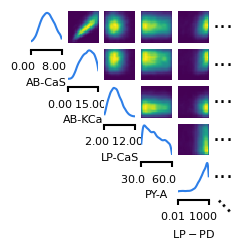

In [156]:
import matplotlib.patheffects as pe

with mpl.rc_context(fname='../../.matplotlibrc'):

    labels_ = get_labels_8pt()
    labels_[9] += ''

    fig, axes = samples_nd(samples=[sample_params_norm[:10000]],
                           subset=[2,4,10,19,28],
                           limits=lims,
                           ticks=lims,
                           tick_labels=all_labels,
                           fig_size=(17.0*0.135, 17.0*0.135),
                           labels=labels_,
                           scatter_offdiag={'rasterized':True, 'alpha':1.0},
                           samples_colors=[col['SNPE']],
                           diag=['kde'],
                           upper=['kde'],
                           hist_offdiag={'bins':50},
                           plot_offdiag={'linewidth': 1.6, 'path_effects':[pe.Stroke(linewidth=2.4, foreground='k'), pe.Normal()]})

    plt.savefig(PANEL_D, facecolor='None', transparent=True)
    plt.show()

# Panel D: posterior samples

In [14]:
all_traces = []
for parameter_index in range(6):
    all_traces.append(simulate(deepcopy(sample_params[parameter_index]),
                      seed=sample_seeds[parameter_index]))

0 0
1 0
2 0
0 1
1 1
2 1


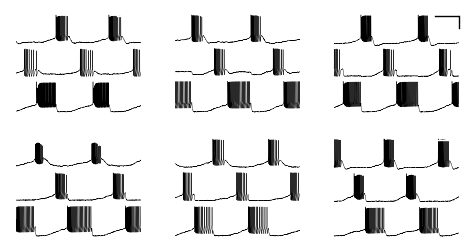

In [158]:
offsets = [39000, 89000, 45000, 39000, 39000, 79000]

with mpl.rc_context(fname='../../.matplotlibrc'):

    fig = viz.viz_path_and_samples_abstract_twoRows(
        traces=all_traces,
        t=get_time(),
        figsize=(5.87, 3.0), offsets=offsets,
        mycols=col, time_len=int(time_len),
    )
    
    plt.savefig(PANEL_E, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

0 0
1 0
2 0
0 1
1 1
2 1


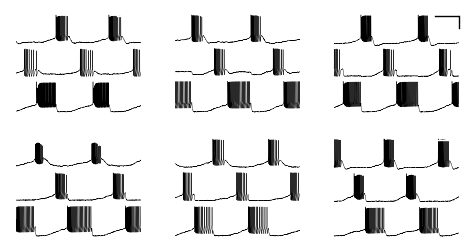

In [159]:
#labels_ = viz.get_labels_8pt(params)
offsets = [39000, 89000, 45000, 39000, 39000, 79000]
# #offsets[0] = 47000
# offsets[1] = 83500 # 75500
# offsets[2] = 29000 # 21000
# offsets[3] = 40500 # 40500

with mpl.rc_context(fname='../../.matplotlibrc'):

    fig = viz.viz_path_and_samples_abstract_twoRows(
        traces=all_traces,
        t=get_time(),
        figsize=(5.87, 3.0), offsets=offsets,
        mycols=col, time_len=int(time_len),
    )

#     plt.savefig(PANEL_E, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

# Panel E / F: alternative

In [160]:
trace_classifier = simulate(deepcopy(params_accepted_by_classifier[69]), seed=0) # 61
trace_posterior = simulate(deepcopy(sample_params[2]), seed=sample_seeds[2])

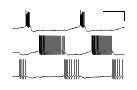

In [161]:
fig, ax = plt.subplots(1,1,figsize=(2.2,1.4))
viz.vis_sample_plain(
    voltage_trace=trace_classifier,
    t=get_time(),
    axV=ax,
    time_len=int(time_len),
    offset=0,
    col="k",
    scale_bar=True,
    scale_bar_voltage=True,
    print_label=False,
)
plt.savefig(PANEL_E, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

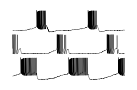

In [162]:
fig, ax = plt.subplots(1,1,figsize=(2.2,1.4))
viz.vis_sample_plain(
    voltage_trace=trace_posterior,
    t=get_time(),
    axV=ax,
    time_len=int(time_len),
    offset=45000,
    col="k",
    scale_bar=False,
    scale_bar_voltage=False,
    print_label=False,
)
plt.savefig(PANEL_F, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
plt.show()

# Assemble figure

In [163]:
color_mixture1 = 0.33 * np.asarray(list(col['CONSISTENT1'])) + 0.67 * np.asarray(
    list(col['CONSISTENT2']))
color_mixture2 = 0.67 * np.asarray(list(col['CONSISTENT1'])) + 0.33 * np.asarray(
    list(col['CONSISTENT2']))

In [72]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [169]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

startx1 = 492
startx2 = 594
starty1 = 204
starty2 = 307

endx1 = 642
endx2 = 673
endy1 = 159
endy2 = 191

deltax1 =  endx1-startx1
deltax2 =  endx2-startx2
deltay1 =  endy1-starty1
deltay2 =  endy2-starty2

sizefactor = 1.0
dshift = 0.5*factor_svg

f = Figure("20.3cm", "6.1cm",

    Panel(
          SVG(PANEL_A_smaller).scale(svg_scale).scale(0.9).move(0, 15*factor_svg),
          Text("a", -4.7*factor_svg, 16.9*factor_svg-dshift, **kwargs_text),
    ).move(4.7*factor_svg, -14.4*factor_svg+dshift),

    Panel(
        SVG(PANEL_B).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
        Text("b", -2.0*factor_svg, 5*factor_svg-dshift, **kwargs_text),
        Text("PD", -1.*factor_svg, 8.5*factor_svg, **kwargs_text8pt),
        Text("LP", -1.*factor_svg, 14.2*factor_svg, **kwargs_text8pt),
        Text("PY", -1.*factor_svg, 19.8*factor_svg, **kwargs_text8pt),
        Text("1", 13.8*factor_svg, 4.5*factor_svg, **kwargs_text8pt),
        Text("2", 10.4*factor_svg, 11.3*factor_svg, **kwargs_text8pt),
        Text("3", 22.35*factor_svg, 11.3*factor_svg, **kwargs_text8pt),
        Text("4", 17.0*factor_svg, 16.4*factor_svg, **kwargs_text8pt),
    ).move(2.0*factor_svg, 18.5*factor_svg+dshift),

    Panel(
          SVG(PANEL_C).scale(svg_scale).move(-10*factor_svg,0*factor_svg),
          Text("c", -10.5*factor_svg, 2.0*factor_svg-dshift, **kwargs_text),
    ).move(41.0*factor_svg, 0.5*factor_svg+dshift),

    Panel(
          SVG(PANEL_D).scale(svg_scale).move(-10*factor_svg,0*factor_svg),
          Text("d", -10.5*factor_svg, 2.0*factor_svg-dshift, **kwargs_text),
    ).move(79.5*factor_svg, 0.5*factor_svg+dshift),

    Panel(
          SVG(PANEL_E).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
          Text("e", 0*factor_svg, 3.5*factor_svg-dshift, **kwargs_text),
    ).move(111*factor_svg, -1.2*factor_svg+dshift),

   Panel(
          SVG(PANEL_F).scale(svg_scale).move(0*factor_svg, 0*factor_svg),
          Text("f", 0*factor_svg, 3.5*factor_svg-dshift, **kwargs_text),
    ).move(111*factor_svg, 20.2*factor_svg+dshift)
)

!mkdir -p fig
f.save("../fig/fig1.svg")
svg('../fig/fig1.svg')

### Supplementary: quantitative comparison between simulation-informed prior and posterior

In [52]:
PANEL_prior_stats = '../svg/panel_prior_stats.svg'
PANEL_sim_inf_prior_stats = '../svg/panel_sim_inf_prior_stats.svg'
PANEL_post_stats = '../svg/panel_post_stats.svg'

In [53]:
npz = np.load("../../results/pyloricsamples_31D_noNaN_only56.npz")

In [54]:
summstats = npz['stats']

stats_mean = np.mean(summstats, axis=0)
stats_std  = np.std(summstats, axis=0)

In [55]:
from joblib import delayed, Parallel
import torch

In [56]:
npz = np.load("../../results/experimental_data/summstats_prep845_082_0044.npz")
observation = npz["summ_stats"]

In [57]:
names = []
for num in range(15):
    names.append(viz.get_summ_stat_name_text(num))

In [125]:
num_sims = 500

### Prior

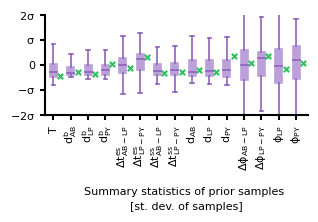

In [126]:
import seaborn as sns
import pandas as pd

norm_ss = (np.asarray(summstats)[:num_sims,:15]-stats_mean[:15])/stats_std[:15]

with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1, figsize=(3.4*1.0, 1.3))
    plt.scatter(np.arange(15)+0.4, (observation[:15]-stats_mean[:15])/stats_std[:15], marker='x', s=15.0, color=col['GT'])
    df = pd.DataFrame(np.asarray(norm_ss))

    box = sns.boxplot(data=df, width=0.4, fliersize=.0, linewidth=1.2) # , color='#0570b0'
    for i, patch in enumerate(box.artists):
        r, g, b, a = patch.get_facecolor() # r, g, b, a = patch.get_facecolor()
        patch.set_facecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # patch.set_facecolor((r, g, b, .6))
        patch.set_edgecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # WANT A BRIGHTER ONE!
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col['CONSISTENT1'])
            line.set_mfc(col['CONSISTENT1'])
            line.set_mec(col['CONSISTENT1'])
            
    ax.set_ylim([-2,2])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels(['$\mathdefault{-2} \sigma$', '$\mathdefault{-}\sigma$', '0', '$\sigma$', '$\mathdefault{2} \sigma$'])
    ax.text(0.15,  -0.8, 'Summary statistics of prior samples', transform=ax.transAxes)
    ax.text(0.322, -0.95, '[st. dev. of samples]', transform=ax.transAxes)
    plt.savefig(PANEL_prior_stats, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

### Simulation-informed prior

In [127]:
torch.manual_seed(0)

flow_samples = torch.as_tensor(params_accepted_by_classifier[:num_sims])
seeds = torch.randint(0, 10000, (num_sims, 1))
params_with_seeds = torch.cat((flow_samples, seeds), axis=1).detach().numpy()

In [128]:
def simulator(params_set):
    out_target = simulate(
        deepcopy(params_set[:-1].astype(np.float64)),
        seed=int(params_set[-1]),
    )
    return stats(out_target)

simulation_outputs = Parallel(n_jobs=4)(
    delayed(simulator)(batch)
    for batch in params_with_seeds
)
simulation_outputs = np.asarray(simulation_outputs)

In [129]:
ss_noNan = []
for s in simulation_outputs:
    if np.invert(np.any(np.isnan(s))):
        ss_noNan.append(s)
ss_noNan = np.asarray(ss_noNan)
print("Number of good sets:  ", ss_noNan.shape[0])

Number of good sets:   37


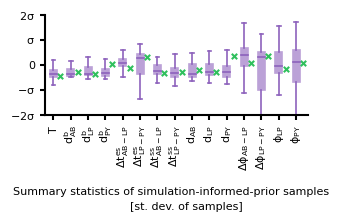

In [130]:
# import seaborn as sns
import pandas as pd

norm_ss = (np.asarray(ss_noNan)[:,:15]-stats_mean[:15])/stats_std[:15]

with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1, figsize=(3.4*1., 1.3))
    plt.scatter(np.arange(15)+0.4, (observation[:15]-stats_mean[:15])/stats_std[:15], marker='x', s=15.0, color=col['GT'])
    df = pd.DataFrame(np.asarray(norm_ss))

    box = sns.boxplot(data=df, width=0.4, fliersize=.0, linewidth=1.2) # , color='#0570b0'
    for i, patch in enumerate(box.artists):
        r, g, b, a = patch.get_facecolor() # r, g, b, a = patch.get_facecolor()
        patch.set_facecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # patch.set_facecolor((r, g, b, .6))
        patch.set_edgecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # WANT A BRIGHTER ONE!
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col['CONSISTENT1'])
            line.set_mfc(col['CONSISTENT1'])
            line.set_mec(col['CONSISTENT1'])
        
    ax.set_ylim([-2,2])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels(['$\mathdefault{-2} \sigma$', '$\mathdefault{-}\sigma$', '0', '$\sigma$', '$\mathdefault{2} \sigma$'])
    ax.text(-0.12,  -0.8, 'Summary statistics of simulation-informed-prior samples', transform=ax.transAxes)
    ax.text(0.322, -0.95, '[st. dev. of samples]', transform=ax.transAxes)
    plt.savefig(PANEL_sim_inf_prior_stats, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

### Posterior

In [131]:
torch.manual_seed(0)

flow_samples = torch.as_tensor(sample_params[:num_sims])
seeds = torch.randint(0, 10000, (num_sims, 1))
params_with_seeds = torch.cat((flow_samples, seeds), axis=1).detach().numpy()

In [132]:
def simulator(params_set):
    out_target = simulate(
        deepcopy(params_set[:-1].astype(np.float64)),
        seed=int(params_set[-1]),
    )
    return stats(out_target)

simulation_outputs_post = Parallel(n_jobs=4)(
    delayed(simulator)(batch)
    for batch in params_with_seeds
)
simulation_outputs_post = np.asarray(simulation_outputs_post)

In [133]:
ss_noNan_post = []
for s in simulation_outputs_post:
    if np.invert(np.any(np.isnan(s))):
        ss_noNan_post.append(s)
ss_noNan_post = np.asarray(ss_noNan_post)
print("Number of good sets:  ", ss_noNan_post.shape[0])

Number of good sets:   482


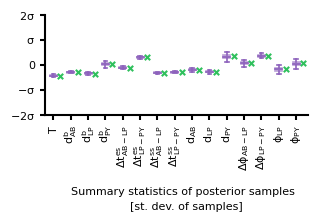

In [134]:
import seaborn as sns
import pandas as pd

norm_ss = (np.asarray(ss_noNan_post)[:,:15]-stats_mean[:15])/stats_std[:15]

with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1, figsize=(3.4*1.0, 1.3))
    plt.scatter(np.arange(15)+0.4, (observation[:15]-stats_mean[:15])/stats_std[:15], marker='x', s=15.0, color=col['GT'])
    df = pd.DataFrame(np.asarray(norm_ss))

    box = sns.boxplot(data=df, width=0.4, fliersize=.0, linewidth=1.2) # , color='#0570b0'
    for i, patch in enumerate(box.artists):
        r, g, b, a = patch.get_facecolor() # r, g, b, a = patch.get_facecolor()
        patch.set_facecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # patch.set_facecolor((r, g, b, .6))
        patch.set_edgecolor(1-((1-np.asarray(col['CONSISTENT1'])))*0.6) # WANT A BRIGHTER ONE!
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col['CONSISTENT1'])
            line.set_mfc(col['CONSISTENT1'])
            line.set_mec(col['CONSISTENT1'])
            
    ax.set_ylim([-2,2])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-2, -1, 0, 1, 2])
    ax.set_yticklabels(['$\mathdefault{-2} \sigma$', '$\mathdefault{-}\sigma$', '0', '$\sigma$', '$\mathdefault{2} \sigma$'])
    ax.text(0.10,  -0.8, 'Summary statistics of posterior samples', transform=ax.transAxes)
    ax.text(0.322, -0.95, '[st. dev. of samples]', transform=ax.transAxes)
    plt.savefig(PANEL_post_stats, facecolor='None', transparent=True, dpi=300, bbox_inches='tight')
    plt.show()

### Assemble figure

In [135]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

startx1 = 492
startx2 = 594
starty1 = 204
starty2 = 307

endx1 = 642
endx2 = 673
endy1 = 159
endy2 = 191

deltax1 =  endx1-startx1
deltax2 =  endx2-startx2
deltay1 =  endy1-starty1
deltay2 =  endy2-starty2

sizefactor = 1.0
dshift = 0.5*factor_svg

f = Figure("20.3cm", "4.7cm",
           
    Panel(
          SVG(PANEL_prior_stats).scale(svg_scale).scale(0.9).move(0, 15*factor_svg),
    ).move(0*factor_svg, -14.4*factor_svg+dshift),
           
    Panel(
          SVG(PANEL_sim_inf_prior_stats).scale(svg_scale).scale(0.9).move(0, 15*factor_svg),
    ).move(47*factor_svg, -14.4*factor_svg+dshift),

    Panel(
          SVG(PANEL_post_stats).scale(svg_scale).scale(0.9).move(0, 15*factor_svg),
    ).move(94*factor_svg, -14.4*factor_svg+dshift),
)

!mkdir -p fig
f.save("../fig/fig1_supp_quantitative_comparison.svg")
svg('../fig/fig1_supp_quantitative_comparison.svg')